# **TikTok Project**
### **Regression Analysis: Modelling**

At Tiktok, the data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The TikTok team is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, we have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

## **PACE: Plan**

In [3]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Load the dataset
data= pd.read_csv(r'C:\Users\user\Desktop\Course 5\tiktok_dataset.csv')

## **PACE: Analyze**



### **Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

In [16]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [19]:
# Check number of rows and columns
print(data.shape)

(19382, 12)


In [18]:
# Get info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB
None


In [20]:
# Generate basic descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle `missing values`.

In [24]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [26]:
# Drop rows with missing values
data= data.dropna(axis= 0)

In [27]:
data.shape

(19084, 12)

 Check for and handle `duplicates`

In [32]:
data.duplicated().sum()

0

### Quick Insight
 There are no duplicates, and the null values have been taken care of. In this case, deleted because it can be said to be insignificant because we had `298` nulls out of a total of `19382`.

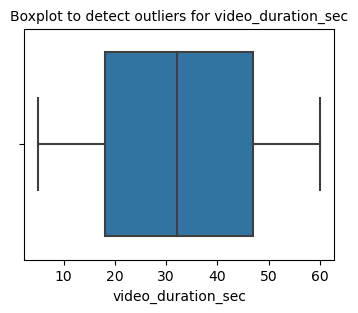

In [37]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize= (4, 3))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=10)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

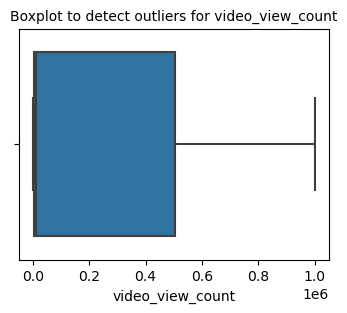

In [36]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(4, 3))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=10)
sns.boxplot(x=data['video_view_count'])
plt.show()

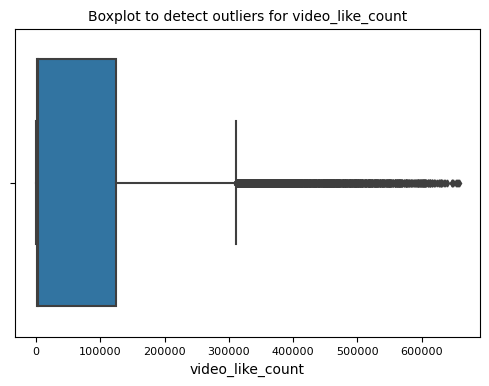

In [49]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,4))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_like_count'], fliersize= 3.5)
plt.show()

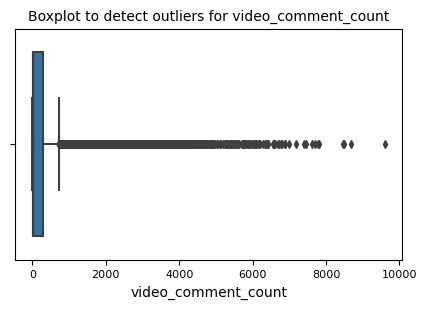

In [46]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,3))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_comment_count'], fliersize=4)
plt.show()

In [50]:
# Check for and handle outliers
percentile25= data['video_like_count'].quantile(0.25)
percentile75= data['video_like_count'].quantile(0.75)

iqr= percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr


data.loc[data['video_like_count'] > upper_limit, 'video_like_count']= upper_limit

In [51]:
# Check for and handle outliers

percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

Check class balance.

In [52]:
data['verified_status'].value_counts(normalize= True )

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94% of the dataset represents videos posted by unverified accounts and 6% represents videos posted by verified accounts. So the outcome variable is not balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [58]:
# Identify data points from majority and minority classes
data_majority=data [data['verified_status']=='not verified']
data_minority= data[data['verified_status']=='verified']

# Upsample the minority class
data_minority_upsampled= resample(data_minority, replace= True, n_samples= len(data_majority), random_state=0)
# Combine majority class with unsampled minority class
data_upsampled= pd.concat([data_majority, data_minority_upsampled]).reset_index(drop= True)

# Display new class count
data_upsampled['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [59]:
data_upsampled.shape

(35768, 12)

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [64]:
data_upsampled[['verified_status', 'video_transcription_text']].groupby(by= 'verified_status')[['video_transcription_text']].agg(func= lambda array:np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [65]:
data_upsampled['text_lenght']= data_upsampled['video_transcription_text'].apply(func=lambda text:len(text))

In [66]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_lenght
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


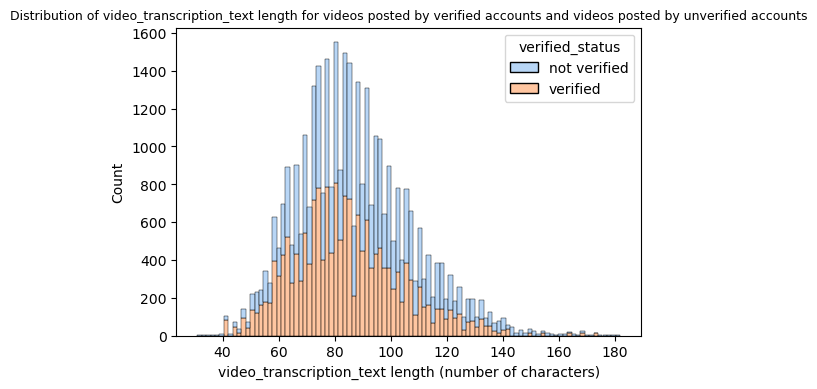

In [82]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
plt.figure(figsize=(6,4))
sns.histplot(data= data_upsampled, stat= 'count', multiple= 'stack', x='text_lenght', kde= False, palette= 'pastel', hue='verified_status', legend= True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts", fontsize=9)
plt.show()

### Examine correlation

In [87]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(method= 'pearson')

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_lenght
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_lenght,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


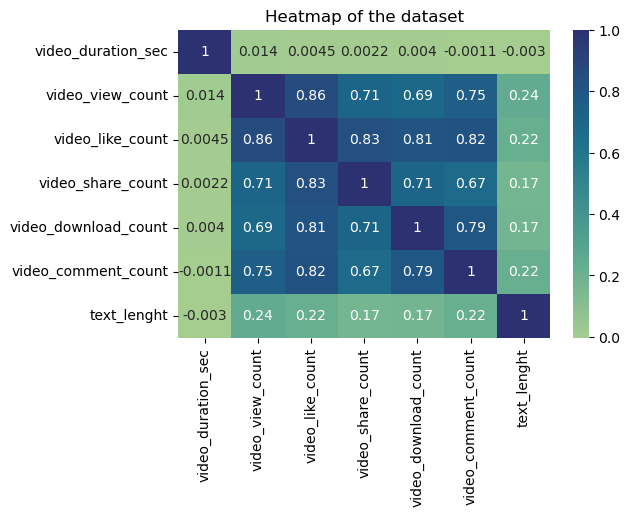

In [95]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6,4))
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_lenght"]].corr(), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. We must take this into consideration as we examine the heatmap and choose which features to proceed with.

**Quick Insight:** The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, we could exclude `video_like_count`. And among the variables that quantify video metrics, we could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. 

In [100]:
# Select outcome variable
y= data_upsampled['verified_status']

In [101]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


**Quick Insight:** The `#` and `video_id` columns are not selected as features here, because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. Also, `video_like_count` is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### Train-test split

In [102]:
x_train, x_test, y_train, y_test= train_test_split(X,y , test_size= 0.25, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [103]:
# Get shape of each training and testing set
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **Encode variables**

In [104]:
# Check data types for features
x_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [106]:
# Get unique values in `claim_status`
x_train["claim_status"].value_counts()

opinion    17474
claim       9352
Name: claim_status, dtype: int64

In [107]:
# Get unique values in `author_ban_status`
x_train["author_ban_status"].value_counts()

active          22773
under review     2386
banned           1667
Name: author_ban_status, dtype: int64

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. We will bve using One hot encoding.

In [108]:
# Select the training features that needs to be encoded
x_train_to_encode= x_train[['claim_status', 'author_ban_status']]
x_train_to_encode.head()

,claim_status,author_ban_status
28075,opinion,active
28358,opinion,active
27086,claim,active
7104,claim,active
25784,opinion,under review


In [110]:
# Set an encoder for One-hot encoding the categorical features
x_encoder = OneHotEncoder(drop='first', sparse=False)

In [111]:
# Fit and transform the training features using the encoder
x_train_encoded = x_encoder.fit_transform(x_train_to_encode)

In [112]:
# Get feature names from encoder
x_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [115]:
# Display first few rows of encoded training features
x_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [122]:
# Place encoded training features (which is currently an array) into a dataframe
x_train_encoded_df = pd.DataFrame(data=x_train_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows
x_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,1.0


In [123]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
28075,52,7612.0,105.0,1.0,0.0
28358,23,9303.0,593.0,49.0,13.0
27086,11,366577.0,40248.0,1486.0,598.0
7104,43,176311.0,22270.0,1546.0,557.0
25784,24,4320.0,194.0,23.0,0.0


In [124]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
x_train_final = pd.concat([x_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), x_train_encoded_df], axis=1)

# Display first few rows
x_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,7612.0,105.0,1.0,0.0,1.0,0.0,0.0
1,23,9303.0,593.0,49.0,13.0,1.0,0.0,0.0
2,11,366577.0,40248.0,1486.0,598.0,0.0,0.0,0.0
3,43,176311.0,22270.0,1546.0,557.0,0.0,0.0,0.0
4,24,4320.0,194.0,23.0,0.0,1.0,0.0,1.0


Check the data type of the outcome variable.

In [125]:
print(y_train.dtype)
print(y_train.unique())

object
['verified' 'not verified']


A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.


Encode categorical values of the outcome variable the training set using an appropriate method.

In [126]:
# Set up an encoder to one-hot encode the categorical outcome variable
y_encoder= OneHotEncoder(drop= 'first', sparse= False)

In [128]:
# Encode the training outcome variable
''' Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
   Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
   '''
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 0., 0., 0.])

### Model building

In [130]:
# Constuct a logistic regression model and fit it to the training set
log_clf= LogisticRegression(random_state= 0 ).fit(x_train_final, y_train_final)


## **PACE: Execute**

### **Results and evaluation**

Encode categorical features in the testing set using an appropriate method.

In [133]:
# Select the testing features that needs to be encoded
x_test_to_encode = x_test[["claim_status", "author_ban_status"]]
x_test_to_encode.head()

,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,active
27310,opinion,active
27560,opinion,active


In [134]:
# Transform the testing features using the encoder
x_test_encoded = x_encoder.transform(x_test_to_encode)
x_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [136]:
# Place encoded testing features from array to dataframe
x_test_encoded_df = pd.DataFrame(data=x_test_encoded, columns=x_encoder.get_feature_names_out())

# Display first few rows
x_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [138]:
# Display first few rows of `x_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
26849,12,2177.0,168.0,6.0,2.0
1227,43,862507.0,86137.0,3206.0,265.0
25467,13,7457.0,100.0,7.0,2.0
27310,6,6388.0,133.0,9.0,1.0
27560,34,4075.0,325.0,16.0,4.0


In [140]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
x_test_final = pd.concat([x_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), x_test_encoded_df], axis=1)

# Display first few rows
x_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,12,2177.0,168.0,6.0,2.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,13,7457.0,100.0,7.0,2.0,1.0,0.0,0.0
3,6,6388.0,133.0,9.0,1.0,1.0,0.0,0.0
4,34,4075.0,325.0,16.0,4.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [141]:
y_pred= log_clf.predict(x_test_final)

In [144]:
# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [145]:
# Display the true labels of the testing set
y_test

26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
16315    not verified
19045        verified
30024        verified
17501    not verified
29483        verified
Name: verified_status, Length: 8942, dtype: object

In [146]:
# Encode the testing outcome variable
''' Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
 - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
 '''
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 0., 1., ..., 1., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [147]:
x_train_final.shape, y_train_final.shape, x_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### **Visualize model results**


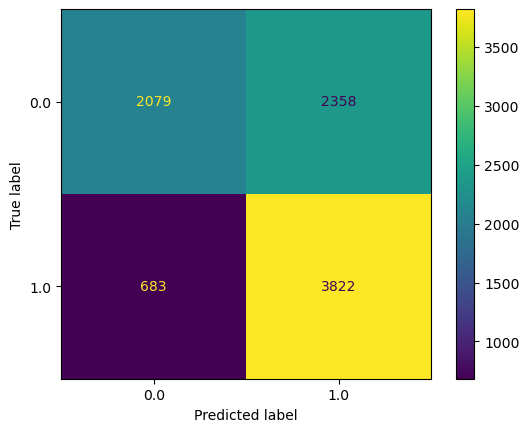

In [150]:
# Compute values for confusion matrix
log_cm= confusion_matrix(y_test_final, y_pred, labels= log_clf.classes_)

# Create display of confusion matrix
log_disp= ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels= log_clf.classes_)

# Plot confusion matrix
log_disp.plot()
plt.show()

### **Quick Insight**
 The upper-left quadrant displays the true negative: the number of videos posted by unverified accounts that the model accurately predicted so.
 
 The upper right quadrant displays false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.
 
 The lower left quadrant displays false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.
 
 The lower right quadrant is true positive: the number of videos posted by verified accounts that the modeel accurately predicted so.
 
 **Note:** A perfect model would yield all true positive and true negatives, and no false negative or false positive

**Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.**

In [154]:
# Create classification for logistic regression model
target_labels= ['verified', 'not verified']
print(classification_report(y_test_final, y_pred, target_names= target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.47      0.58      4437
not verified       0.62      0.85      0.72      4505

    accuracy                           0.66      8942
   macro avg       0.69      0.66      0.65      8942
weighted avg       0.69      0.66      0.65      8942



**Quick Insight:** The classification report above shows that the logistic regression model achieved a precision of 69% and a recall of 66% (weighted averages), and it achieved an accuracy of 66%.

## Interpret model coefficient

In [155]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008421
1,video_view_count,-0.000002
2,video_share_count,0.000007
3,video_download_count,-0.000033
4,video_comment_count,-0.000520
5,claim_status_opinion,0.000382
6,author_ban_status_banned,-0.000019
7,author_ban_status_under review,0.000001


# Conclusion

**My Insight to data professionals**
- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.01 increase in the log-odds of the user having a verified status.
- The logistic regression model had decent predictive power: a precision of 69% and a recall of 66% (weighted averages), and it achieved an accuracy of 66%.


**My Insight to stakeholders**
We developed a logistic regression model for verified status based on video features. The model had decent predictive power (69% precision and 66% recall). Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.